In [1]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

figsize=(14, 4)

from utils import DataAggregator, DataFetcher
import utils.data_visualizator as utils_dv

# Introduction
Football is a complex sport, with many variables that can influence the outcome of a match. Predicting the results of these games is a well-known and extensively studied topic, particularly in the betting industry. Companies offering bets on football matches aim to provide odds that present a realistic view of a game's outcome while remaining profitable. If the odds are too favorable, the likelihood of financial losses increases for the company. Conversely, if the odds are too low, fewer people may be inclined to place bets on those matches.

For individuals, the ability to successfully predict football match outcomes can provide a significant advantage over betting companies, potentially leading to substantial financial gains.

As sports enthusiasts who closely follow football, we are passionate about understanding the dynamics of the game. Through this project, we aim to explore various methods and techniques to develop increasingly accurate predictive models. Ultimately, we hope to determine if it is possible to gain an edge over betting companies by reliably predicting football matches.

# Dataset
To start off, we have identified a dataset provided by the company Football-data. They offer a database of football matches from across Europe, spanning the last 20+ years. The data is available on their website, [football-data.co.uk](https://www.football-data.co.uk/). 

In this notebook, we will explore the dataset, visualize key properties, and summarize our findings. In subsequent notebooks, we will develop increasingly sophisticated models, leveraging the insights gained from this analysis.

## Download the data

In [2]:
data_fetcher = DataFetcher()
data_fetcher.main()

EC: 0.00B [00:00, ?B/s]


https://www.football-data.co.uk/mmz4281/0203/EC does not exist.


EC: 0.00B [00:00, ?B/s]


https://www.football-data.co.uk/mmz4281/0304/EC does not exist.


EC: 0.00B [00:00, ?B/s]

https://www.football-data.co.uk/mmz4281/0405/EC does not exist.


Now we have downloaded data from 22 different leagues. The data spans from the year 2002 all the way up to this year. This data can be used in many different ways. Lets start off by looking at the data from the English Premier League.

In [3]:
data_aggregator = DataAggregator()
data = data_aggregator.get_data(["E0"])
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,...,16,7,8,0,2,0,0,2.30,3.25,3.00
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,...,14,8,6,3,1,0,0,5.00,3.40,1.72
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,...,13,6,6,1,2,0,0,2.37,3.25,2.87
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,...,11,3,6,2,3,0,0,1.72,3.40,5.00
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,...,11,5,0,2,3,1,0,2.87,3.20,2.40


As we can see, we have quite a lot of features that can be used in different models. For the explanation of all names used in the dataframes, view [this](/notebook/utils/notes.txt) file with the info regarding them.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8440 entries, 0 to 8439
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       8440 non-null   object 
 1   Date      8440 non-null   object 
 2   HomeTeam  8440 non-null   object 
 3   AwayTeam  8440 non-null   object 
 4   FTHG      8440 non-null   int64  
 5   FTAG      8440 non-null   int64  
 6   FTR       8440 non-null   object 
 7   HTHG      8440 non-null   int64  
 8   HTAG      8440 non-null   int64  
 9   HTR       8440 non-null   object 
 10  Referee   8440 non-null   object 
 11  HS        8440 non-null   int64  
 12  AS        8440 non-null   int64  
 13  HST       8440 non-null   int64  
 14  AST       8440 non-null   int64  
 15  HF        8440 non-null   int64  
 16  AF        8440 non-null   int64  
 17  HC        8440 non-null   int64  
 18  AC        8440 non-null   int64  
 19  HY        8440 non-null   int64  
 20  AY        8440 non-null   int6

In [5]:
data.isnull().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
dtype: int64

As we can see above, there is no missing data in the dataframes!

# Exploration
Now that we have taken an initial look at the dataset, lets take a closer look and see if we can find anything interesting.

In [6]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000
mean,1.538981,1.179858,0.688626,0.518128,13.709597,10.895261,6.025000,4.734479,11.163389,11.604028,6.034360,4.783649,1.469905,1.779621,0.060664,0.085545,2.766518,3.988768,4.760006
std,1.309684,1.157825,0.836972,0.731790,5.394489,4.723012,3.319959,2.799031,3.664663,3.831575,3.109527,2.756306,1.211215,1.284696,0.249882,0.290514,1.943559,1.186381,3.975765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.500000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.660000,3.300000,2.400000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.200000,3.500000,3.400000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.000000,4.200000,5.500000
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,28.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,23.000000,17.000000,41.000000


One initial key takeaway, is that it seems like home teams have an advantage. From expert knowledge, we know that this makes sense, as home teams often get a boost from their supporters. In addition, they play on the pitch they are most used to playing on, which might give a slight advantage.

We can also see that the average goals a home team scores is about 1.54, while the average for away teams is 1.18.

To further analyze this, lets take a look at how common the different outcomes of games are, i.e., a home win, a draw, or an away win.

In [7]:
home_percentage, away_percentage, draw_percentage = data["FTR"].value_counts(normalize=True)

In [8]:
print(f"The number of games won by the home team is {home_percentage:.2%}")

The number of games won by the home team is 45.95%


In [9]:
print(f"The number of games ending in a draw is {draw_percentage:.2%}")

The number of games ending in a draw is 24.56%


In [10]:
print(f"The number of games won by the away team is {away_percentage:.2%}")

The number of games won by the away team is 29.49%


As we have just seen, our observation is absolutely correct, and the probability of a home win is quite substantial in contrast to a draw and an away team win.

However, from expert knowledge, we also know that this can vary, based on the teams. For example, teams such as Liverpool, Manchester City and Chelsea are known to be very good teams, while teams such as Norwich, Wolverhamptoon and Watford are weaker teams. Lets have a look at how the probabilities change if we just take a look at these teams.

In [11]:
strong_teams_home_percentage, strong_teams_away_percentage, strong_teams_draw_percentage = data[(data["HomeTeam"]=="Liverpool") | (data["HomeTeam"]=="Man City") | (data["HomeTeam"]=="Chelsea")]["FTR"].value_counts(normalize=True)
weak_teams_home_percentage, weak_teams_away_percentage, weak_teams_draw_percentage = data[(data["HomeTeam"]=="Norwich") | (data["HomeTeam"]=="Watford") | (data["HomeTeam"]=="Wolverhampton")]["FTR"].value_counts(normalize=True)

In [12]:
print(f"""The probability that Liverpool, Manchester City or Chelsea win a game at home is {strong_teams_home_percentage:.2%}
The probability that Liverpool, Manchester City or Chelsea draw a game at home is {strong_teams_draw_percentage:.2%}
The probability that Liverpool, Manchester City or Chelsea win a game away is {strong_teams_away_percentage:.2%}
      """)

print(f"""The probability that Norwich, Watford or Wolverhampton win a game at home is {weak_teams_home_percentage:.2%}
The probability that Norwich, Watford or Wolverhampton draw a game at home is {weak_teams_draw_percentage:.2%}
The probability that Norwich, Watford or Wolverhampton win a game away is {weak_teams_away_percentage:.2%}
      """)

The probability that Liverpool, Manchester City or Chelsea win a game at home is 65.01%
The probability that Liverpool, Manchester City or Chelsea draw a game at home is 13.43%
The probability that Liverpool, Manchester City or Chelsea win a game away is 21.56%
      
The probability that Norwich, Watford or Wolverhampton win a game at home is 42.86%
The probability that Norwich, Watford or Wolverhampton draw a game at home is 26.69%
The probability that Norwich, Watford or Wolverhampton win a game away is 30.45%
      


## Visualization
For a further exploration of the data, lets visualize some features.

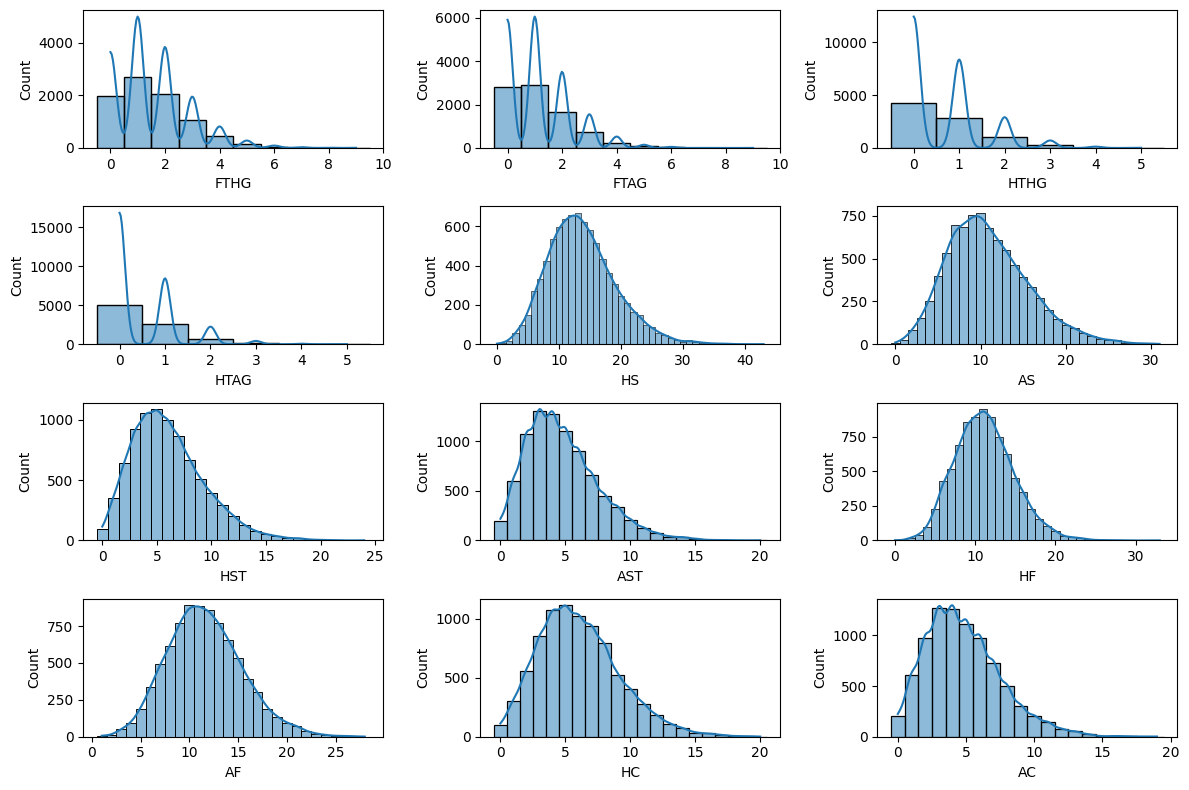

In [13]:
utils_dv.plot_column_distributions(data, 
                                   cols=[
                                       "FTHG",
                                       "FTAG",
                                       "HTHG",
                                       "HTAG",
                                       "HS",
                                       "AS",
                                       "HST",
                                       "AST",
                                       "HF",
                                       "AF",
                                       "HC",
                                       "AC",
                                       "HY",
                                       "AY"
                                       ])

From the figures above, we can se that all models act in a logistic probability distribution.

However, as proposed in [this](https://www.researchgate.net/publication/228621612_Bayesian_modelling_of_football_outcomes_Using_the_Skellam's_distribution_for_the_goal_difference) paper, predicting goal difference can often lead to even better results than just predicitng the number of goals for each team. Thus, lets plot the goal difference distribution.

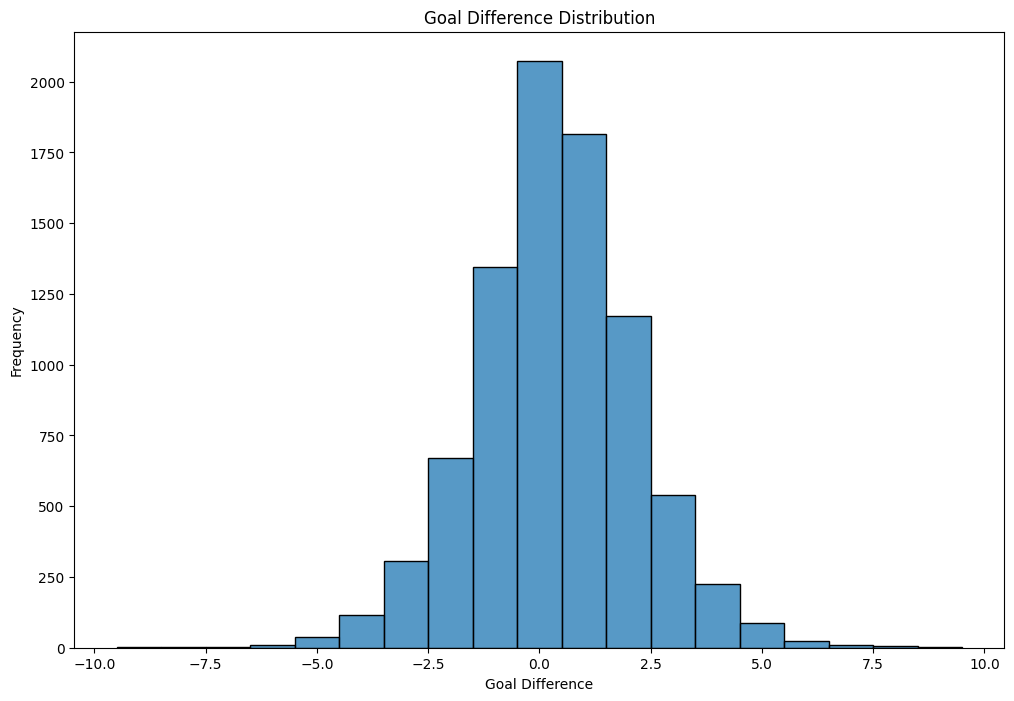

In [14]:
data["GD"] = data["FTHG"] - data["FTAG"]
utils_dv.plot_goal_difference_distribution(data)

As we have already discussed, we can see that it seems to be a scewed distribution with a tendency that the home team scores more goals than the away team, and thus wins more matches.

Before we move on to create some features and manipulate the data, lets have a look at some basic models that can be created from the dataset we have available.